# Load data

In [1]:
import yfinance as yf
df = yf.Ticker("006208.TW").history(period = "10y")
df #檢查用

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-05-22 00:00:00+08:00,25.388353,25.591343,25.388353,25.591343,133000,0.0,0.0,0.0
2014-05-23 00:00:00+08:00,25.663840,25.700088,25.627590,25.678337,8000,0.0,0.0,0.0
2014-05-26 00:00:00+08:00,25.787088,25.787088,25.787088,25.787088,1000,0.0,0.0,0.0
2014-05-27 00:00:00+08:00,25.801586,25.830585,25.794338,25.830585,11000,0.0,0.0,0.0
2014-05-28 00:00:00+08:00,26.098818,26.098818,26.098818,26.098818,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-05-15 00:00:00+08:00,96.650002,98.199997,96.650002,97.500000,4232415,0.0,0.0,0.0
2024-05-16 00:00:00+08:00,98.699997,99.300003,97.849998,98.099998,7812350,0.0,0.0,0.0
2024-05-17 00:00:00+08:00,98.099998,98.199997,97.650002,97.800003,3381637,0.0,0.0,0.0


#  Filter Data

In [2]:
df = df.filter(["Close"]) # 過濾需要的Topic
df = df.rename(columns = {"Close": "RealValue"})
df #檢查用

,RealValue
Date,
2014-05-22 00:00:00+08:00,25.591343
2014-05-23 00:00:00+08:00,25.678337
2014-05-26 00:00:00+08:00,25.787088
2014-05-27 00:00:00+08:00,25.830585
2014-05-28 00:00:00+08:00,26.098818
...,...
2024-05-15 00:00:00+08:00,97.500000
2024-05-16 00:00:00+08:00,98.099998
2024-05-17 00:00:00+08:00,97.800003


# Visualize data
check the style packages in the list

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


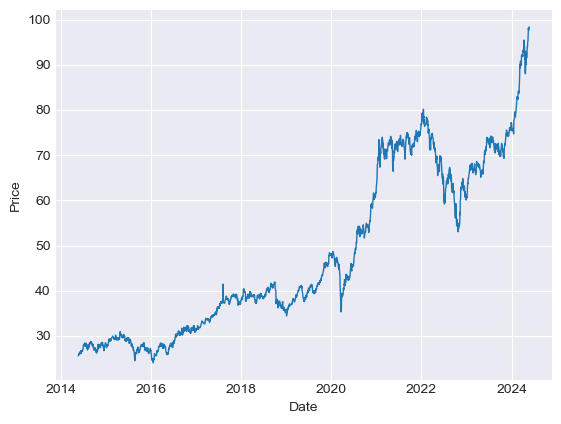

In [4]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["RealValue"], linewidth = 1)
plt.show()

# Standardize

In [5]:
from sklearn.preprocessing import MinMaxScaler

# 把數據按比例縮小至0~1範圍
scaler=MinMaxScaler(feature_range = (0, 1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.02055667],
       [0.02172694],
       [0.02318989],
       ...,
       [0.99192865],
       [0.98991078],
       [1.        ]])

# Construct datasets

In [6]:
import numpy as np
MOVING_WIN_SIZE = 60 #設定天數

all_x, all_y = [], []
for i in range(len(scaled_prices)-MOVING_WIN_SIZE):
    x=scaled_prices[i:i+MOVING_WIN_SIZE]
    y=scaled_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y) # data type: python list => numpy array

In [7]:
all_x.shape

(2378, 60, 1)

In [8]:
all_y.shape

(2378, 1)

# Split dataset

In [9]:
DS_SPLIT =0.8
train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y=all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y=all_x[train_ds_size:], all_y[train_ds_size:]

In [10]:
train_x.shape

(1902, 60, 1)

In [11]:
train_y.shape

(1902, 1)

In [12]:
test_x.shape

(476, 60, 1)

In [13]:
test_y.shape

(476, 1)

# Construct model

In [14]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(train_x.shape[1],1
)))

model.add(LSTM(
    units=50,
    return_sequences=False
))

model.add(Dense(
    units=25
))

model.add(Dense(
    units=1
))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor = "val_loss", patience=10, restore_best_weights = True)
train_history = model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    callbacks=[callback],
    epochs=1000
)

Epoch 1/1000

48/48 [==============================] - 4s 32ms/step - loss: 0.0027 - val_loss: 6.9179e-04
Epoch 2/1000
48/48 [==============================] - 1s 19ms/step - loss: 1.6347e-04 - val_loss: 7.6518e-04
Epoch 3/1000
48/48 [==============================] - 1s 18ms/step - loss: 1.5696e-04 - val_loss: 7.8864e-04
Epoch 4/1000
48/48 [==============================] - 1s 18ms/step - loss: 1.4006e-04 - val_loss: 5.5377e-04
Epoch 5/1000
48/48 [==============================] - 1s 19ms/step - loss: 1.3854e-04 - val_loss: 4.9865e-04
Epoch 6/1000
48/48 [==============================] - 1s 18ms/step - loss: 1.3907e-04 - val_loss: 7.5951e-04
Epoch 7/1000
48/48 [==============================] - 1s 18ms/step - loss: 1.2204e-04 - val_loss: 4.3461e-04
Epoch 8/1000
48/48 [==============================] - 1s 18ms/step - loss: 1.1695e-04 - val_loss: 4.4874e-04
Epoch 9/1000
48/48 [==============================] - 1s 18ms/step - loss: 1.1326e-04 - val_loss: 3.7873e-04
Epoch 10/1000
48/48 [=

# Evaluate Model

In [17]:
predicts = model.predict(test_x)
predicts

15/15 [==============================] - 1s 6ms/step


array([[0.6157646 ],
       [0.6074212 ],
       [0.60794014],
       [0.6086762 ],
       [0.60505766],
       [0.5877724 ],
       [0.5753924 ],
       [0.56783634],
       [0.56495655],
       [0.56010073],
       [0.55241144],
       [0.5576    ],
       [0.5536821 ],
       [0.542663  ],
       [0.53677666],
       [0.5459728 ],
       [0.5513173 ],
       [0.54823023],
       [0.53316844],
       [0.5058414 ],
       [0.48315287],
       [0.47680676],
       [0.47190654],
       [0.48337197],
       [0.4996911 ],
       [0.506737  ],
       [0.4971028 ],
       [0.50143445],
       [0.50796896],
       [0.51851904],
       [0.5259544 ],
       [0.52868307],
       [0.52946824],
       [0.5354156 ],
       [0.5414529 ],
       [0.54385126],
       [0.5390535 ],
       [0.53834486],
       [0.5403479 ],
       [0.5465767 ],
       [0.54959667],
       [0.54240334],
       [0.53817296],
       [0.5382094 ],
       [0.55158913],
       [0.5611154 ],
       [0.56393903],
       [0.558

In [18]:
predicts=scaler.inverse_transform(predicts)
predicts

array([[69.83718 ],
       [69.216965],
       [69.25554 ],
       [69.31025 ],
       [69.04126 ],
       [67.75633 ],
       [66.836044],
       [66.27435 ],
       [66.06027 ],
       [65.69931 ],
       [65.12771 ],
       [65.51341 ],
       [65.22217 ],
       [64.403046],
       [63.965473],
       [64.649086],
       [65.04637 ],
       [64.816895],
       [63.69725 ],
       [61.665844],
       [59.97925 ],
       [59.507504],
       [59.143238],
       [59.99554 ],
       [61.20865 ],
       [61.73242 ],
       [61.016247],
       [61.338245],
       [61.824   ],
       [62.60826 ],
       [63.160984],
       [63.36382 ],
       [63.422188],
       [63.864296],
       [64.31309 ],
       [64.49138 ],
       [64.13473 ],
       [64.08205 ],
       [64.23094 ],
       [64.69398 ],
       [64.91847 ],
       [64.38374 ],
       [64.06927 ],
       [64.071976],
       [65.06658 ],
       [65.774734],
       [65.984634],
       [65.57549 ],
       [65.84115 ],
       [66.39045 ],


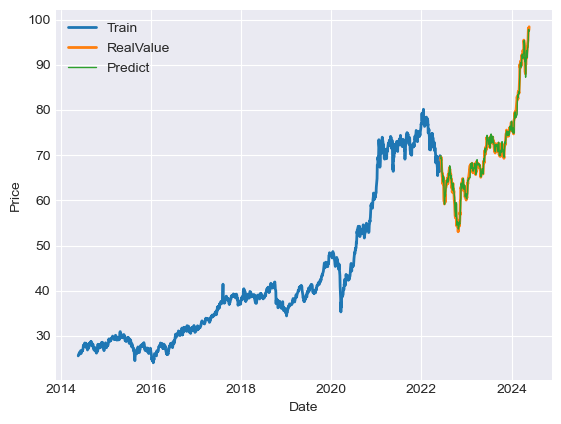

In [19]:
train_df=df[:train_ds_size + MOVING_WIN_SIZE]
test_df=df[train_ds_size+MOVING_WIN_SIZE:]
test_df=test_df.assign(Predict=predicts)

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(train_df["RealValue"], linewidth=2)
plt.plot(test_df["RealValue"], linewidth=2)
plt.plot(test_df["Predict"], linewidth=1)
plt.legend(("Train", "RealValue", "Predict"))
plt.show()

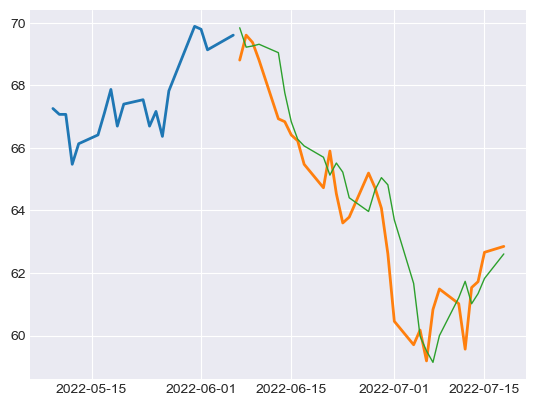

In [20]:
plt.plot(train_df["RealValue"][-20:], linewidth=2)
plt.plot(test_df["RealValue"][:30], linewidth=2)
plt.plot(test_df["Predict"][:30], linewidth=1)
plt.show()

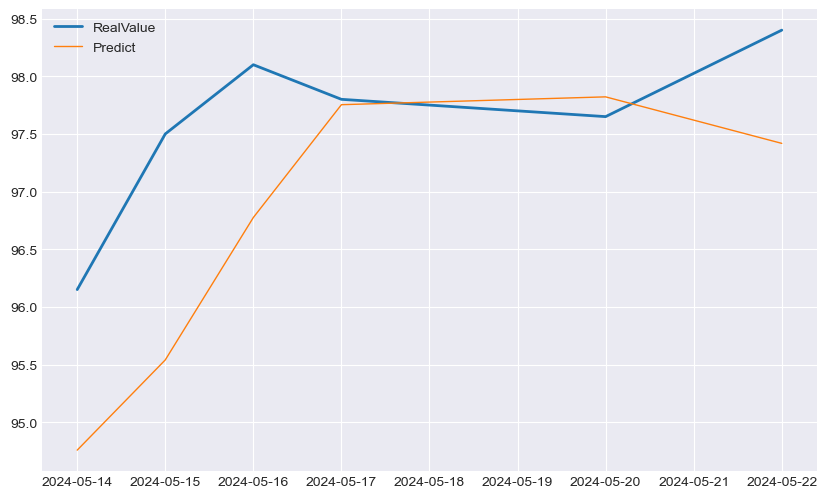

In [105]:
plt.figure(figsize=(10, 6))

plt.plot(test_df["RealValue"][470:], linewidth=2, label="RealValue")
plt.plot(test_df["Predict"][470:], linewidth=1, label="Predict")

plt.legend()  # 添加圖例
plt.show()

In [22]:
test_df=test_df.assign(Shifted=test_df["RealValue"].shift(1))
test_df.iat[0, -1]=train_df.iat[-1, -1]
test_df

,RealValue,Predict,Shifted
Date,,,
2022-06-07 00:00:00+08:00,68.804054,69.837181,69.601372
2022-06-08 00:00:00+08:00,69.601372,69.216965,68.804054
2022-06-09 00:00:00+08:00,69.366859,69.255539,69.601372
2022-06-10 00:00:00+08:00,68.804054,69.310249,69.366859
2022-06-13 00:00:00+08:00,66.928001,69.041260,68.804054
...,...,...,...
2024-05-15 00:00:00+08:00,97.500000,95.540222,96.150002
2024-05-16 00:00:00+08:00,98.099998,96.775284,97.500000
2024-05-17 00:00:00+08:00,97.800003,97.753456,98.099998


In [23]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df["RealValue"], test_df["Predict"], squared = False)
predict_cvrmse = predict_rmse / test_df["RealValue"].mean() * 100
predict_cvrmse

1.30969902994411

In [24]:
shifted_rmse = mean_squared_error(test_df["RealValue"], test_df["Shifted"], squared = False)
shifted_cvrmse = shifted_rmse / test_df["RealValue"].mean() * 100
shifted_cvrmse

1.1122135403945692

# 可以改進的地方
可以使用圖表顯示訓練過程accuracy評估模型準確率 而不是只拿出prediction跟real value的圖表做比較  
輸入資料集需要更多features 才能更準確預估stock  

期末報告需要更嚴謹的研究